## 📝 Notebook Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### 🔹 Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x**2 + x + 1

#### Make data with Numpy:
`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]`

Return **evenly** spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval \[start, stop\].

The endpoint of the interval can optionally be excluded.

In [4]:
x_1 = np.linspace(start=-3, stop=3, num=500)

print(f"First ten elements:\n{x_1[:10]}\nTOTAL: {len(x_1)}")
print(type(x_1))

First ten elements:
[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357]
TOTAL: 500
<class 'numpy.ndarray'>


#### Ploting the data with matplotlib

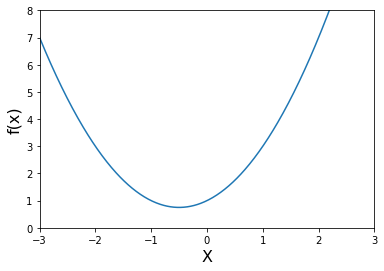

In [5]:
plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

If $f(x)$ is our cost,  then the lowest cost will be at the bottom of this graph. Now we have to find out what's the lowest cost and for what value of x is our cost the lowest. Going from 2 to zero, we see that the cost is decreasing, but as it gets closer to zero, the slope changes from almost vertical to horizontal, meaning that the cost is only *slightly* decreasing. After reaching the minimum, the cost starts to increase again.

The slope of a function is given by that functions derivative. Derivatives are how you calculate a function's rate of change at a given point. 

### Calculus Power Rule
A simple way to get the derivative is using the power rule:
# $$\frac {d}{dx}  x^n = n * x^{n-1}$$

**Examples:**

$\frac {d}{dx}  x^5 = 5 * x^{5-1}$

$\frac {d}{dx}  x^5 = 5x^4$


$\frac {d}{dx}[x^3 - 5x^2 + 7] = 3 * x^{3-1} - 5 * (2 * x^{2-1})$

$\frac {d}{dx}[x^3 - 5x^2 + 7] = 3x^2 - 10x$


$f(x)$
$ \frac {d}{dx}[x^2 + x + 1] = 2 * x^{2-1} + 1 * x^{1-1}$

In [6]:
# Get the slope of the function
def df(x):
    return 2 * x + 1
    

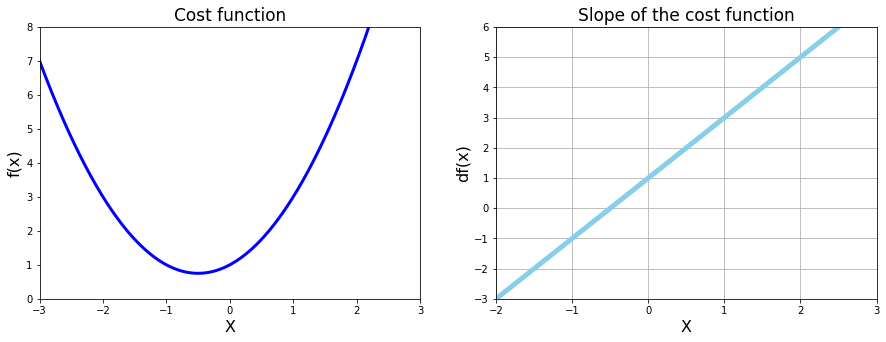

In [7]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)

plt.show()

## Python Loops & Gradient Descent
* Starting point
* Learning rate
* Temporary value 

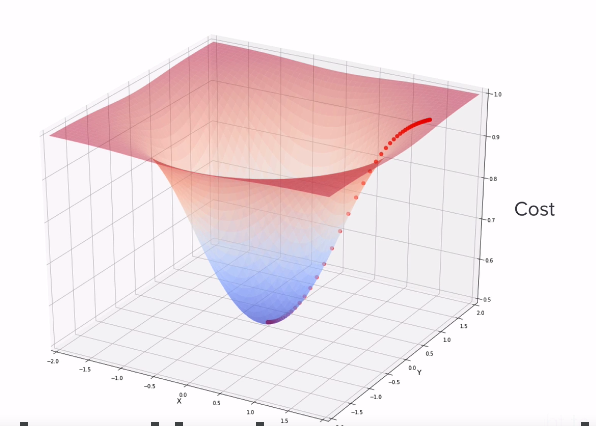

In [8]:
# Gradient
new_x = 3                    # Starting point
previous_x = 0           # Temp value
step_multiplier = 0.1    # Learning rate

for n in range(30):             # 30 is arbitrary
    previous_x = new_x          # new_x is a random guess to start
    gradient = df(previous_x)   # the value of the slope for the previous value of x
    # Learning step: we take a step that'd proportional to the negative of the gradient of the function 
    # at the point that we are at, and then we're subtracting from the previou x value because we want 
    # to move against the gradient towards the minimun
    new_x = previous_x - step_multiplier * gradient 

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cos at this point is: {f(new_x)}" )
    

Local minimum occurs at: -0.4956672098625011
Slope or df(x) value at this point is: 0.008665580274997753
f(x) value or cos at this point is: 0.7500187730703756


In [9]:
# Running again 500 times:
precision = 0.0001

new_x = -3                    
previous_x = 0          
step_multiplier = 0.1 

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):             
    previous_x = new_x          
    gradient = df(previous_x)   
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # The step size decreases each time the loop runs
    if step_size < precision:
        print(f"Loop ran this many times: {n}")
        break
        
    x_list.append(new_x)
    slope_list.append(df(new_x))

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cos at this point is: {f(new_x)}" )
    

Loop ran this many times: 39
Local minimum occurs at: -0.5003323069989462
Slope or df(x) value at this point is: -0.0006646139978923049
f(x) value or cos at this point is: 0.7500001104279416


In [10]:
print(x_list)
print(slope_list)

[-3, -2.5, -2.1, -1.78, -1.524, -1.3192, -1.15536, -1.0242879999999999, -0.9194303999999999, -0.8355443199999999, -0.768435456, -0.7147483647999999, -0.67179869184, -0.637438953472, -0.6099511627776, -0.58796093022208, -0.5703687441776639, -0.5562949953421311, -0.5450359962737049, -0.5360287970189639, -0.5288230376151711, -0.5230584300921369, -0.5184467440737095, -0.5147573952589676, -0.5118059162071741, -0.5094447329657392, -0.5075557863725914, -0.5060446290980731, -0.5048357032784585, -0.5038685626227668, -0.5030948500982134, -0.5024758800785707, -0.5019807040628566, -0.5015845632502852, -0.5012676506002282, -0.5010141204801826, -0.500811296384146, -0.5006490371073168, -0.5005192296858534, -0.5004153837486827]
[-5, -4.0, -3.2, -2.56, -2.048, -1.6383999999999999, -1.3107199999999999, -1.0485759999999997, -0.8388607999999997, -0.6710886399999998, -0.5368709119999999, -0.42949672959999985, -0.3435973836799999, -0.27487790694399994, -0.21990232555519995, -0.17592186044415992, -0.14073748

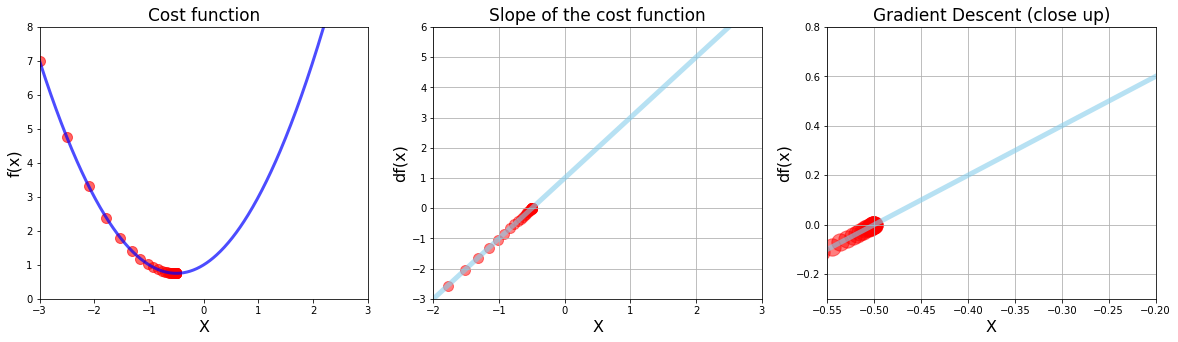

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[20,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', alpha=0.6, s=100)

# Chart 2: Derivative

plt.subplot(1, 3, 2)

plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (Close up)

plt.subplot(1, 3, 3)

plt.title("Gradient Descent (close up)", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-0.55, -0.2])
plt.ylim(-0.3, 0.8)

plt.grid()

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [13]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return (x ** 4) - (4 * (x ** 2)) + 5

def dg(x):
    return (4 * (x ** 3)) - (8 * x)

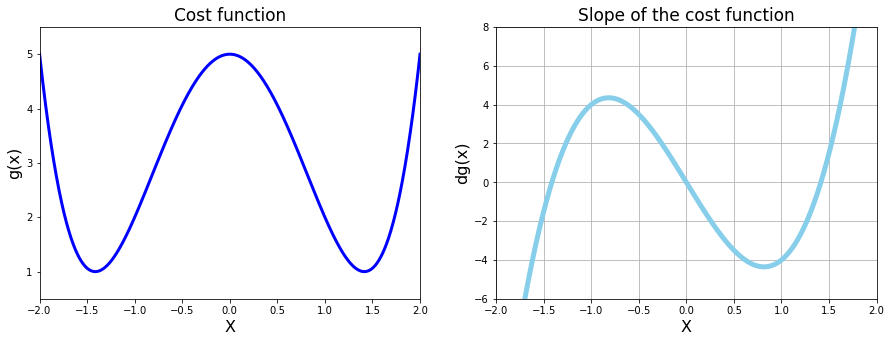

In [14]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [57]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess                    

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):             
        previous_x = new_x          
        gradient = derivative_func(previous_x)   
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        # The step size decreases each time the loop runs

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

# print(f"Local minimum occurs at: {new_x}")
# print(f"Slope or derivative_f(x) value at this point is: {df(new_x)}")
# print(f"f(x) value or cost at this point is: {f(new_x)}" )

In [24]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

print(f"Local minimum occurs at: {local_min}")
print(f"Number of steps: {len(list_x)}")
# print(f"Slope or derivative_function(x) value at this point is: {dg(local_min)}")
# print(f"g(x) value or cost at this point is: {g(new_x)}" )

Local minimum occurs at: 1.4122375085019094
Number of steps: 23


In [30]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.5, 
                                                 multiplier=0.01, 
                                                 precision=0.0001)
print(f"Local minimum occurs at: {local_min}")
print(f"Number of steps: {len(list_x)}")

Local minimum occurs at: -1.4137636556157256
Number of steps: 56


In [28]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.1)
print(f"Local minimum occurs at: {local_min}")
print(f"Number of steps: {len(list_x)}")

Local minimum occurs at: -1.4120887490901561
Number of steps: 34


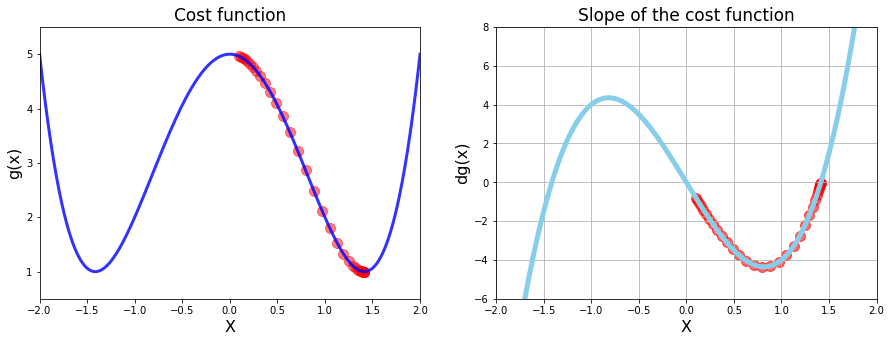

In [41]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.5)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

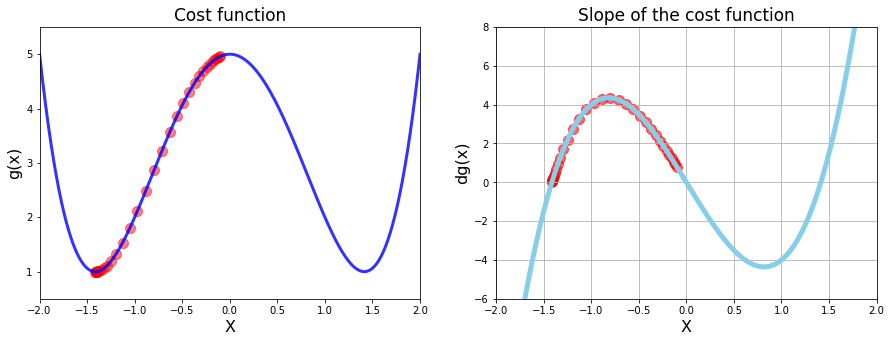

In [42]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.5)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

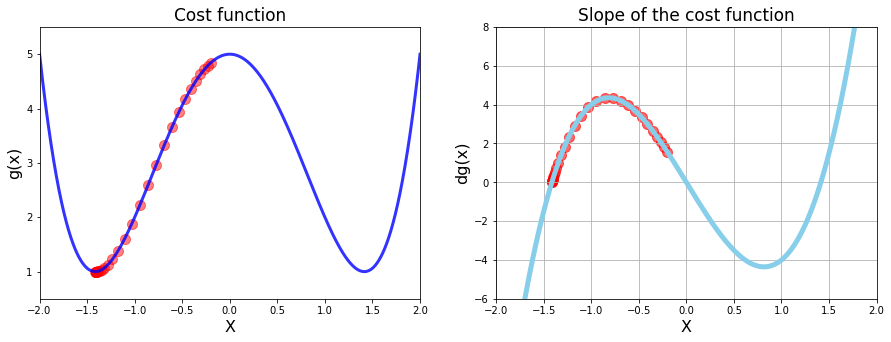

In [56]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.2)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.5)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

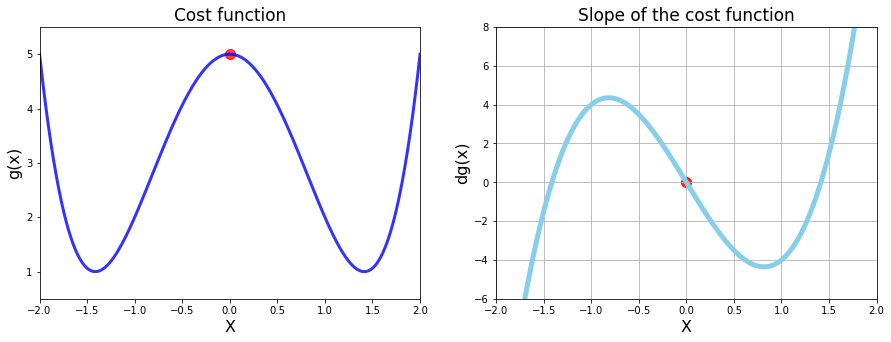

In [45]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.5)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

The path of the descent can be very much influenced by our initial guest.

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 +2$$

In [50]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return (x ** 5) - (2 * (x ** 4)) + 2

def dh(x):
    return (5 * (x ** 4)) - (8 * (x ** 3))

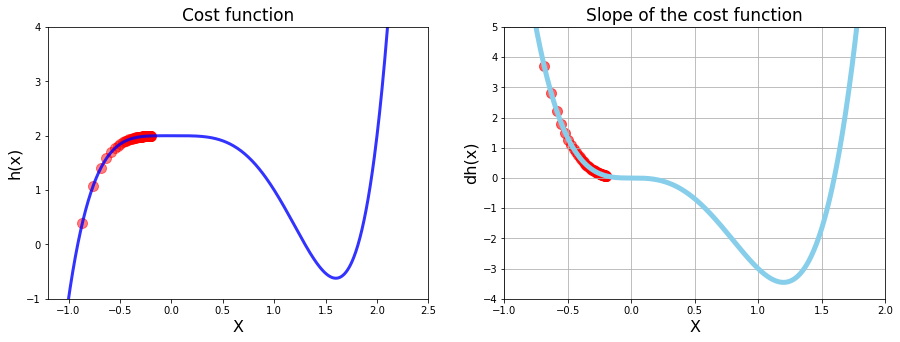

Local minimum occurs at: -2071072.4470816324
Cost at this minimum is -3.810455326061589e+31
Number of steps: 71


In [64]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess=-0.2,
                                                max_iter=70)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Subplot display graphs side by side 

# Chart 1: Cost function 
# Side by side: (n rows=1, n columns=2, index position = 1)
# Vertically stacked: n rows = 2, n columns = 1, index position = 1
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title("Cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.5)

# Chart 2: Derivative

plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title("Slope of the cost function", fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()

plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

print(f"Local minimum occurs at: {local_min}")
print(f"Cost at this minimum is {h(local_min)}")
print(f"Number of steps: {len(list_x)}")

In [69]:
import sys
# help(sys)
# sys.version
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [73]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
lucky_numbers = 13, 7, 9, 11

tuple_with_single_value = 42,
print(tuple_with_single_value, "\n")

main, side, greens = breakfast
print(f"Main course is {main}")
print(f"Side: {side}")
print(f"Greens: {greens}")

(42,) 

Main course is bacon
Side: eggs
Greens: avocado


In [76]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print(f"Local min is {data_tuple[0]}")
print(f"Cost at the last x calue is {h(data_tuple[0])}")

Local min is 1.5989534547394717
Cost at the last x calue is -0.6214287992331258
